In [7]:
using Plots

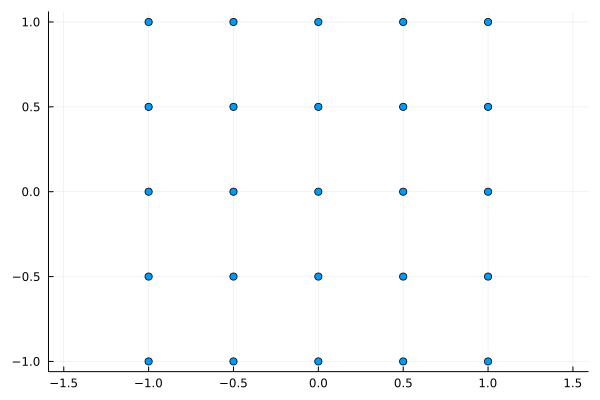

In [11]:
# set up mesh grid
function meshgrid(x0,x1,y0,y1,ne)
    x = collect(range(x0, x1, length=ne+1))
    y = collect(range(y0, y1, length=ne+1))
    
    NodeList = zeros(2,(ne+1)*(ne+1))

    k = 1
    for i in 1:ne+1
        for j in 1:ne+1
            NodeList[1,k] = x[j]
            NodeList[2,k] = y[i]
            k = k + 1
        end
    end

    IEN = zeros(4,ne*ne)
    
    l = 1
    for i in 1:ne
        for j in 1:ne
            IEN[1,l] = (i-1)*(ne+1) + j
            IEN[2,l] = (i-1)*(ne+1) + j + 1
            IEN[3,l] = i*(ne+1) + j + 1
            IEN[4,l] = i*(ne+1) + j
            l = l + 1
        end
    end

    return NodeList, IEN
end

# test case 
x0 = -1.0
x1 = 1.0
y0 = -1.0
y1 = 1.0
ne = 4

NodeList = meshgrid(x0,x1,y0,y1,ne)

plot(NodeList[1,:],NodeList[2,:],seriestype=:scatter,aspect_ratio=:equal,legend=false)

In [8]:
# basis functions

function basis(x1, x2, y1, y2, x, y, h)

    # x1, x2, y1, y2 are the coordinates of the lower left corner of the element
    # x, y are the coordinates of the point where the basis function is evaluated
    # h is the size of the element

    # basis functions
    N = [(x-x1)*(y-y1)/(h^2), (x-x1)*(y2-y)/(h^2), (x2-x)*(y-y1)/(h^2), (x2-x)*(y2-y)/(h^2)]

    Delta_N = [[(x-x1)/(h^2), (x-x1)/(h^2), (x2-x)/(h^2), (x2-x)/(h^2)] 
                [(y-y1)/(h^2), (y2-y)/(h^2), (y-y1)/(h^2), (y2-y)/(h^2)]]

    return N, Delta_N
end 

basis (generic function with 1 method)

In [ ]:
function gaussianQuadrature(a,b)
    ξ = [-(b-a)/(2*sqrt(3))+(b+a)/2, (b-a)/(2*sqrt(3))+(b+a)/2]
    w = [(b-a)/2, (b-a)/2]
    return ξ, w
end

In [25]:
function setboundaryCond()
    q_bar = zeros(ne*ne)

    for i in 1:length(q_bar)
        
    return q_bar
end

1
2
3
4
5
6
7
8
9
10


In [9]:
# try with an element of size 1

h = 1
x1 = 0
x2 = 1
y1 = 0
y2 = 1

x, y = meshgrid(x1, x2, y1, y2, h)
N, Delta_N = basis_function(x1,x2,y1,y2,x,y,h)

# mesh contains 4 elements therefore stiffness matrix will be 2x2
# assemble the stiffness matrix

Gpoints, w = gaussianQuadrature(-1,1)

# element loop

for e in 1:ne*ne

    x1 = NodeList[1,IEN[1,e]]
    y1 = NodeList[2,IEN[1,e]]

    x2 = NodeList[1,IEN[2,e]]
    y2 = NodeList[2,IEN[2,e]]

    x3 = NodeList[1,IEN[3,e]]
    y3 = NodeList[2,IEN[3,e]]

    x4 = NodeList[1,IEN[4,e]]
    y4 = NodeList[2,IEN[4,e]]
    
    # integration loop
    for m in 1:ng
        x = Gpoints[m]
        y = Gpoints[n]
        N, Delta_N = basis_function(x1,x2,y1,y2,x,y,h)

        for i in 1:4
            for j in 1:4
                for k in 1:2
                    for l in 1:2                
                        k += w[m]*Delta_N[i,k]*Delta_N[j,l]
                    end
                end
            end
        end

0.0
1.0
